In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

c:\users\krishnamoorthy\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [42]:
import tensorflow as tf
import random as rn

import os
os.environ['PYTHONHASHSEED'] = '0'

# Setting the seed for numpy generated random numbers
np.random.seed(37)

# Setting the seed for python random numbers
rn.seed(1254)

# Setting the seed for tensorflow random numbers
tf.set_random_seed(89)

from keras import backend as K

# Force tensorflow to use single thread
sess = tf.Session(graph=tf.get_default_graph(), config=tf.session_conf)
K.set_session(sess)

AttributeError: module 'tensorflow' has no attribute 'session_conf'

In [2]:
# Path of the data
train_path = 'train'
valid_path = 'valid'
test_path = 'test'

In [3]:
train_batches = ImageDataGenerator().flow_from_directory(train_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(test_path, target_size=(224,224), classes=['dog','cat'], batch_size=10)

Found 60 images belonging to 2 classes.
Found 32 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [4]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [5]:
imgs, labels = next(train_batches)

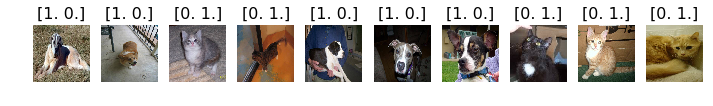

In [6]:
plots(imgs, titles=labels)

In [39]:
test_batches.class_indices

{'dog': 0, 'cat': 1}

The result is the indices of the image<br>
ImageDataGenerator gives the label of dog as [1,0] and label of cat as [0,1]<br>
So the above result gives the dog as 0th index and cat as 1st index

In [12]:
image = plt.imread('train/cat/cat.816.jpg')

(375, 500, 3)


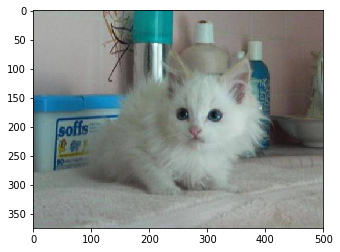

In [25]:
print(image.shape)
plt.imshow(image)

In [7]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(224,224,3), activation='relu'),
    Flatten(),
    Dense(2, activation='softmax')
])

In [8]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
model.fit_generator(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=5, verbose=2)

Epoch 1/5
 - 5s - loss: 7.9081 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.3690 - val_acc: 0.4808
Epoch 3/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.6790 - val_acc: 0.4615
Epoch 4/5
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 5/5
 - 3s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.0590 - val_acc: 0.5000


**<h2>Predict</h2>**

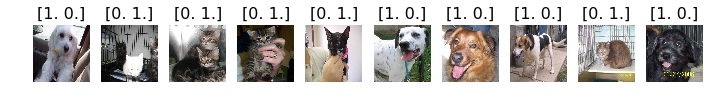

In [37]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [11]:
test_labels = test_labels[:, 0]
test_labels

array([1., 1., 1., 0., 0., 1., 0., 1., 1., 1.], dtype=float32)

In [12]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)
predictions

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [13]:
cm = confusion_matrix(test_labels, predictions[:, 0])

In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[3 0]
 [7 0]]


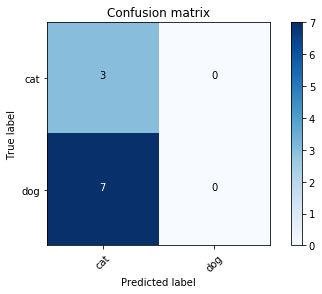

In [15]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, classes=cm_plot_labels)

**<h2>Fine Tuned VGG16 Model</h2>**

In [7]:
vgg16_model = keras.applications.vgg16.VGG16()

In [8]:
vgg16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [9]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [11]:
model.layers.pop()

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [13]:
for layer in model.layers:
    layer.trainable = False

In [14]:
model.add(Dense(2, activation='softmax'))

In [15]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [16]:
model.compile(Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit_generator(train_batches, steps_per_epoch=6, validation_data=valid_batches, validation_steps=6, epochs=5, verbose=2)

Epoch 1/5
 - 57s - loss: 0.6963 - acc: 0.4667 - val_loss: 0.6916 - val_acc: 0.6538
Epoch 2/5
 - 55s - loss: 0.6809 - acc: 0.8167 - val_loss: 0.6783 - val_acc: 0.8846
Epoch 3/5
 - 56s - loss: 0.6696 - acc: 0.9667 - val_loss: 0.6728 - val_acc: 0.8846
Epoch 4/5
 - 52s - loss: 0.6604 - acc: 1.0000 - val_loss: 0.6643 - val_acc: 0.9808
Epoch 5/5
 - 49s - loss: 0.6529 - acc: 1.0000 - val_loss: 0.6580 - val_acc: 0.9808


**<h2>Predict Using Fine Tuned VGG16 Model</h2>**

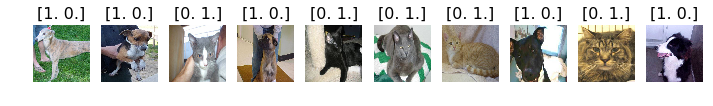

In [18]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [19]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1.], dtype=float32)

In [20]:
predictions = model.predict_generator(test_batches, steps=1, verbose=0)

In [22]:
predictions

array([[0.51841176, 0.4815882 ],
       [0.5291264 , 0.47087365],
       [0.4795151 , 0.52048486],
       [0.5293101 , 0.47068986],
       [0.49063477, 0.5093652 ],
       [0.478102  , 0.52189803],
       [0.47948354, 0.52051646],
       [0.5333588 , 0.46664122],
       [0.47909257, 0.52090746],
       [0.5180853 , 0.4819147 ]], dtype=float32)

In [23]:
cm = confusion_matrix(test_labels, np.round(predictions[:, 0]))

Confusion matrix, without normalization
[[5 0]
 [0 5]]


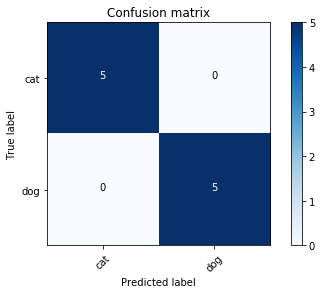

In [26]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm, classes=cm_plot_labels)

**<h2>Data Augmentation</h2>**

In [27]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
       height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
       channel_shift_range=10., horizontal_flip=True)

In [28]:
image = plt.imread('train/dog/dog.6093.jpg')

742512


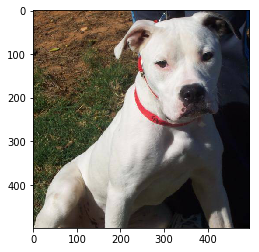

In [29]:
print(image.size)
plt.imshow(image)

c:\users\krishnamoorthy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


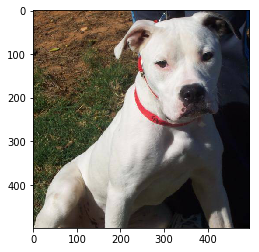

In [33]:
dog_img = np.expand_dims(ndimage.imread('train/dog/dog.6093.jpg'),0)
plt.imshow(dog_img[0])

In [34]:
# Generate batches of augmented images from this image
aug_gen = gen.flow(dog_img)

In [35]:
# Get 10 samples of augmented images
aug_images = [next(aug_gen)[0].astype(np.uint8) for i in range(10)]

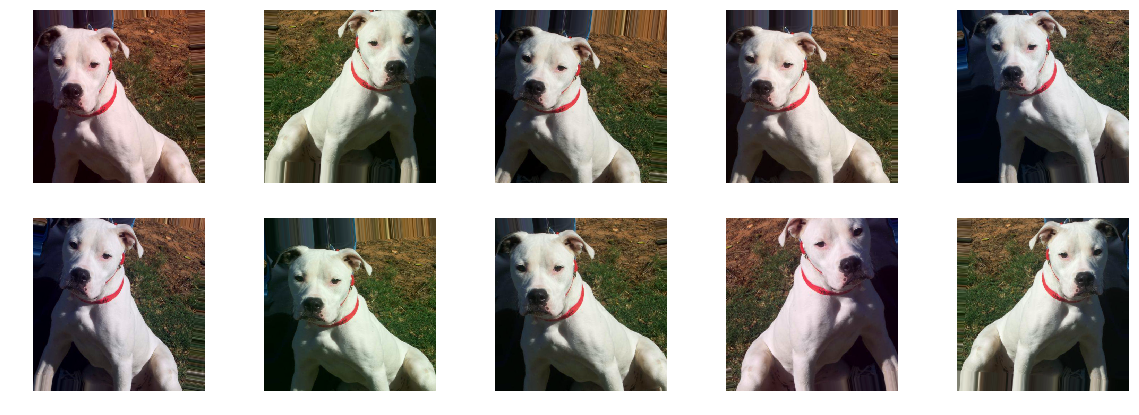

In [36]:
# Augmented Images
plots(aug_images, figsize=(20,7), rows=2)